In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
#loading the data
tests_df = pd.read_csv('tests_data.csv')
tests_df.head()

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,DATE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE
0,0,0,03-03-2020,0,0,1,100.0,0.0,0,0,0,0,1
1,0,0,03-04-2020,0,0,0,0.0,0.0,0,0,0,0,0
2,0,0,03-05-2020,0,0,0,0.0,0.0,0,0,0,0,0
3,0,0,03-06-2020,0,1,0,0.0,0.0,0,0,0,1,0
4,0,0,03-07-2020,0,0,0,0.0,0.0,0,0,0,0,0


In [11]:
tests_df["date"]=tests_df["DATE"].astype('datetime64')
tests_df['month'] = pd.DatetimeIndex(tests_df['date']).month
tests_df['year'] = pd.DatetimeIndex(tests_df['date']).year
#no_date = tests_df.drop(["DATE", "date"], axis = 1) #dropping the original date columns since we don't need them any more
tests_df

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,DATE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE,date,month,year
0,0,0,03-03-2020,0,0,1,100.000000,0.0,0,0,0,0,1,2020-03-03,3,2020
1,0,0,03-04-2020,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-04,3,2020
2,0,0,03-05-2020,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-05,3,2020
3,0,0,03-06-2020,0,1,0,0.000000,0.0,0,0,0,1,0,2020-03-06,3,2020
4,0,0,03-07-2020,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-07,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,190,25,07-13-2021,0,464,49,9.551657,10.3,0,5,2,659,76,2021-07-13,7,2021
498,222,22,07-14-2021,0,416,48,10.344828,10.7,0,6,1,644,71,2021-07-14,7,2021
499,172,21,07-15-2021,0,293,52,15.072464,11.1,0,2,0,467,73,2021-07-15,7,2021
500,9,2,07-16-2021,0,54,4,6.896552,10.8,0,1,0,64,6,2021-07-16,7,2021


In [12]:
clean_df=tests_df.drop(["ANTIGENNEGATIVE", "ANTIGENPOSITIVE","PCRNEGATIVE", 'PCRPOSITIVE',
                       "TOTALNEGATIVE", "TOTALPOSITIVE" ], axis = 1)

In [13]:
clean_df

,DATE,PCRINCONCLUSIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,date,month,year
0,03-03-2020,0,100.000000,0.0,0,0,0,2020-03-03,3,2020
1,03-04-2020,0,0.000000,0.0,0,0,0,2020-03-04,3,2020
2,03-05-2020,0,0.000000,0.0,0,0,0,2020-03-05,3,2020
3,03-06-2020,0,0.000000,0.0,0,0,0,2020-03-06,3,2020
4,03-07-2020,0,0.000000,0.0,0,0,0,2020-03-07,3,2020
...,...,...,...,...,...,...,...,...,...,...
497,07-13-2021,0,9.551657,10.3,0,5,2,2021-07-13,7,2021
498,07-14-2021,0,10.344828,10.7,0,6,1,2021-07-14,7,2021
499,07-15-2021,0,15.072464,11.1,0,2,0,2021-07-15,7,2021
500,07-16-2021,0,6.896552,10.8,0,1,0,2021-07-16,7,2021


In [23]:
clean_df.dtypes

DATE                                object
PCRINCONCLUSIVE                      int64
POSITIVITYRATE                     float64
POSITIVITYRATEROLLINGAVG           float64
SEROLOGYINCONCLUSIVE                 int64
SEROLOGYNEGATIVE                     int64
SEROLOGYPOSITIVE                     int64
date                        datetime64[ns]
month                                int64
year                                 int64
dtype: object

In [58]:
clean_df2=clean_df[["PCRINCONCLUSIVE", "POSITIVITYRATE","POSITIVITYRATEROLLINGAVG", "SEROLOGYINCONCLUSIVE","SEROLOGYNEGATIVE","SEROLOGYPOSITIVE"]].astype('float64')

In [59]:
clean_df2.dtypes

PCRINCONCLUSIVE             float64
POSITIVITYRATE              float64
POSITIVITYRATEROLLINGAVG    float64
SEROLOGYINCONCLUSIVE        float64
SEROLOGYNEGATIVE            float64
SEROLOGYPOSITIVE            float64
dtype: object

In [60]:
clean_df2["date"]=clean_df["date"]
clean_df2["month"]=clean_df["month"]
clean_df2["year"]=clean_df["year"]

In [84]:
clean_df2.dtypes

PCRINCONCLUSIVE                    float64
POSITIVITYRATE                     float64
POSITIVITYRATEROLLINGAVG           float64
SEROLOGYINCONCLUSIVE               float64
SEROLOGYNEGATIVE                   float64
SEROLOGYPOSITIVE                   float64
date                        datetime64[ns]
month                                int64
year                                 int64
dtype: object

In [62]:
clean_df2.to_csv('final_project_data.csv')

In [63]:
#date_df=clean_df2[["date", "month", "year"]]
#date_df.to_csv('date.csv')

positive_results_df=clean_df2[["PCRINCONCLUSIVE", "POSITIVITYRATE", "POSITIVITYRATE", "date"]]
positive_results_df.to_csv('positive_results.csv')

serology_df=clean_df2[["SEROLOGYINCONCLUSIVE", "SEROLOGYNEGATIVE", "SEROLOGYPOSITIVE", "date"]]
serology_df.to_csv('serology.csv')

### Creating table in pd admin

In [88]:
import psycopg2
conn = psycopg2.connect("host=localhost dbname=final_project user=postgres password=olesia1994")

In [89]:
cur = conn.cursor()
cur.execute("""
    CREATE TABLE serology_metrics(
    SEROLOGYINCONCLUSIVE decimal,
    SEROLOGYNEGATIVE decimal,
    SEROLOGYPOSITIVE decimal,
    date date PRIMARY KEY
   )
""")
conn.commit()

In [86]:
cur = conn.cursor()
cur.execute("""
    CREATE TABLE positive_test_results(
    PCRINCONCLUSIVE decimal,
    POSITIVITYRATE decimal,
    POSITIVITYRATEROLLINGAVG decimal,
    date date PRIMARY KEY
   )
""")
conn.commit()

In [36]:
cur = conn.cursor()
cur.execute("""
    CREATE TABLE date(
    date date PRIMARY KEY,
    month integer,
    year integer
   )
""")
conn.commit()

In [37]:
import csv
with open('date.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader) # Skip the header row.
    for row in reader:
        cur.execute(
        "INSERT INTO date(date, month, year) VALUES (%s, %s, %s)",
        row
    )
conn.commit()

In [87]:
import csv
with open('positive_results.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader) # Skip the header row.
    for row in reader:
        cur.execute(
        "INSERT INTO positive_test_results(PCRINCONCLUSIVE, POSITIVITYRATE, POSITIVITYRATEROLLINGAVG, date) VALUES (%s, %s, %s, %s)",
        row
    )
conn.commit()

In [90]:
import csv
with open('serology.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader) # Skip the header row.
    for row in reader:
        cur.execute(
        "INSERT INTO serology_metrics(SEROLOGYINCONCLUSIVE, SEROLOGYNEGATIVE, SEROLOGYPOSITIVE, date) VALUES (%s, %s, %s, %s)",
        row
    )
conn.commit()

### Screenshot of the working tables in pd admin

## Date Table

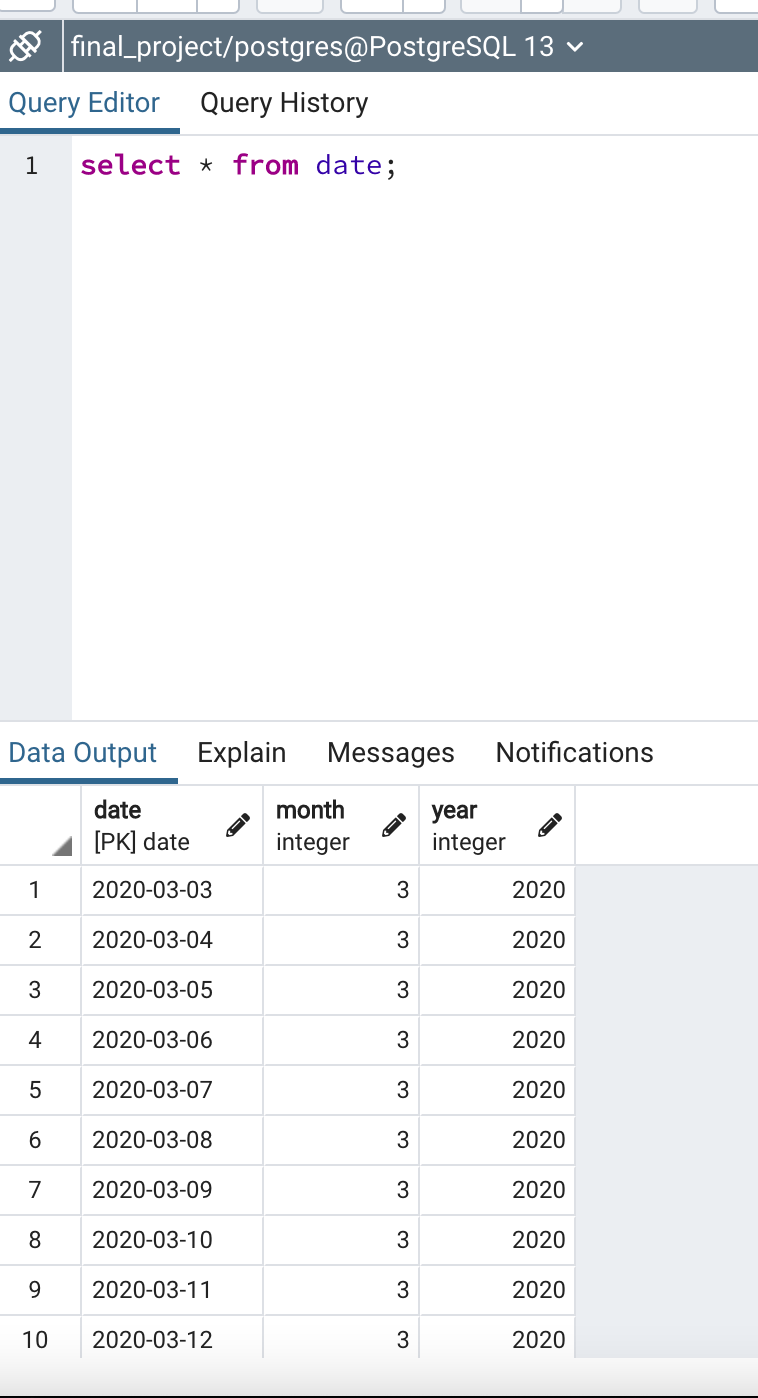

## Serology Metrics Table

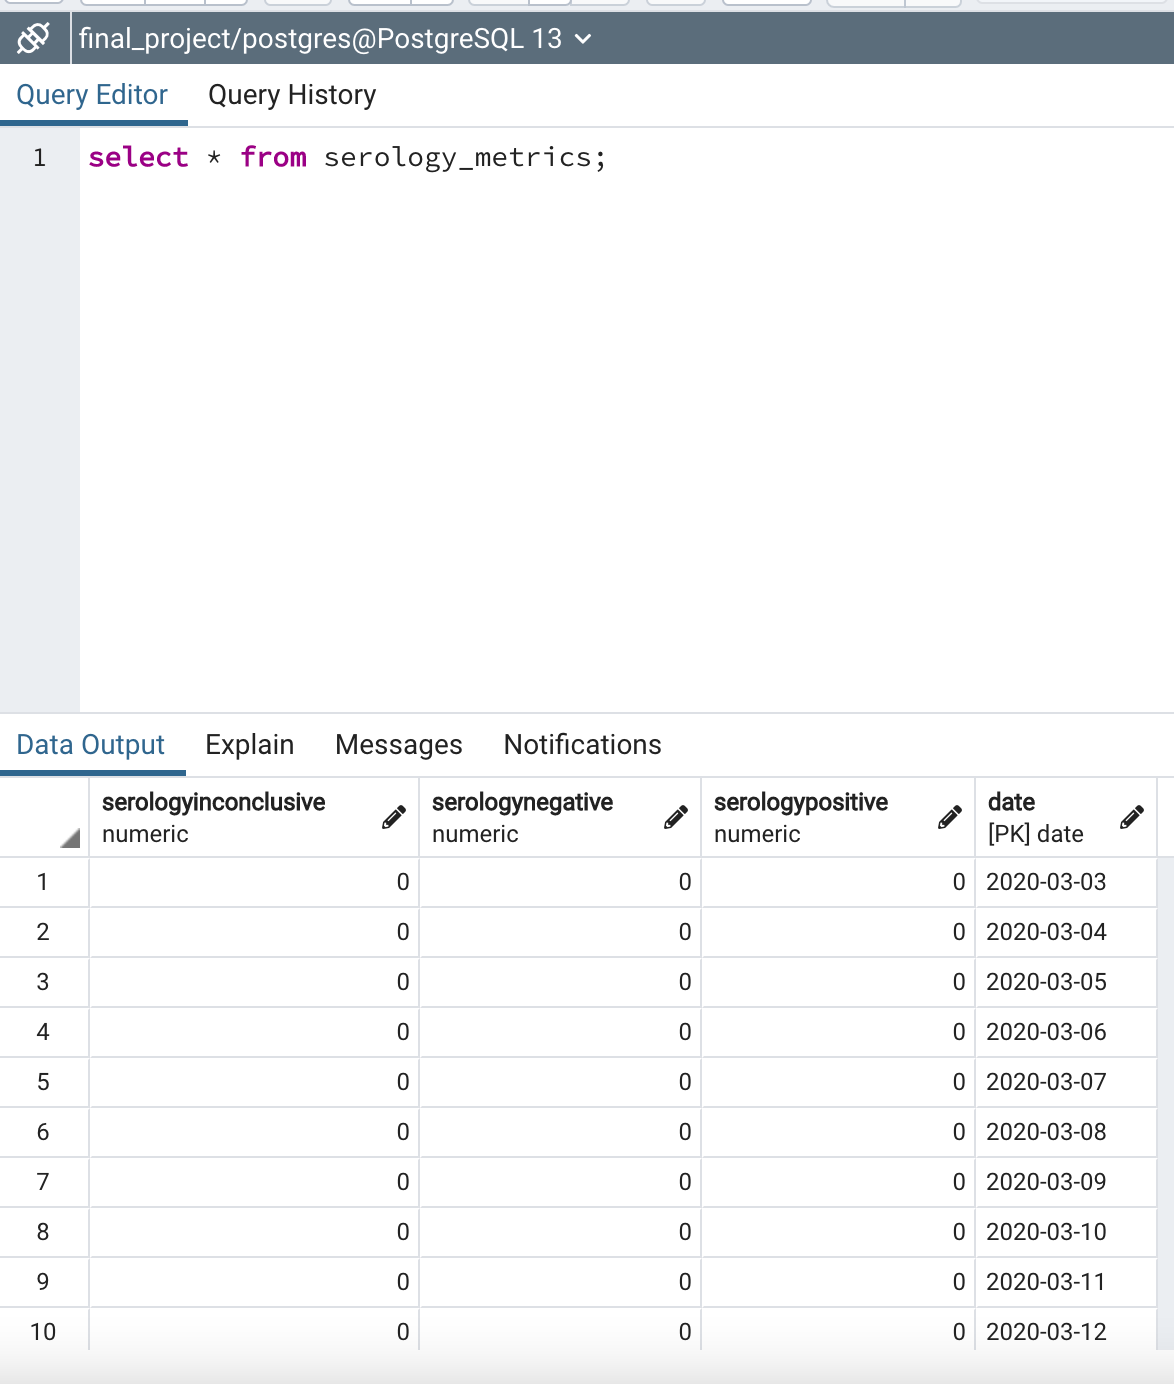

## Positive Test Results Table

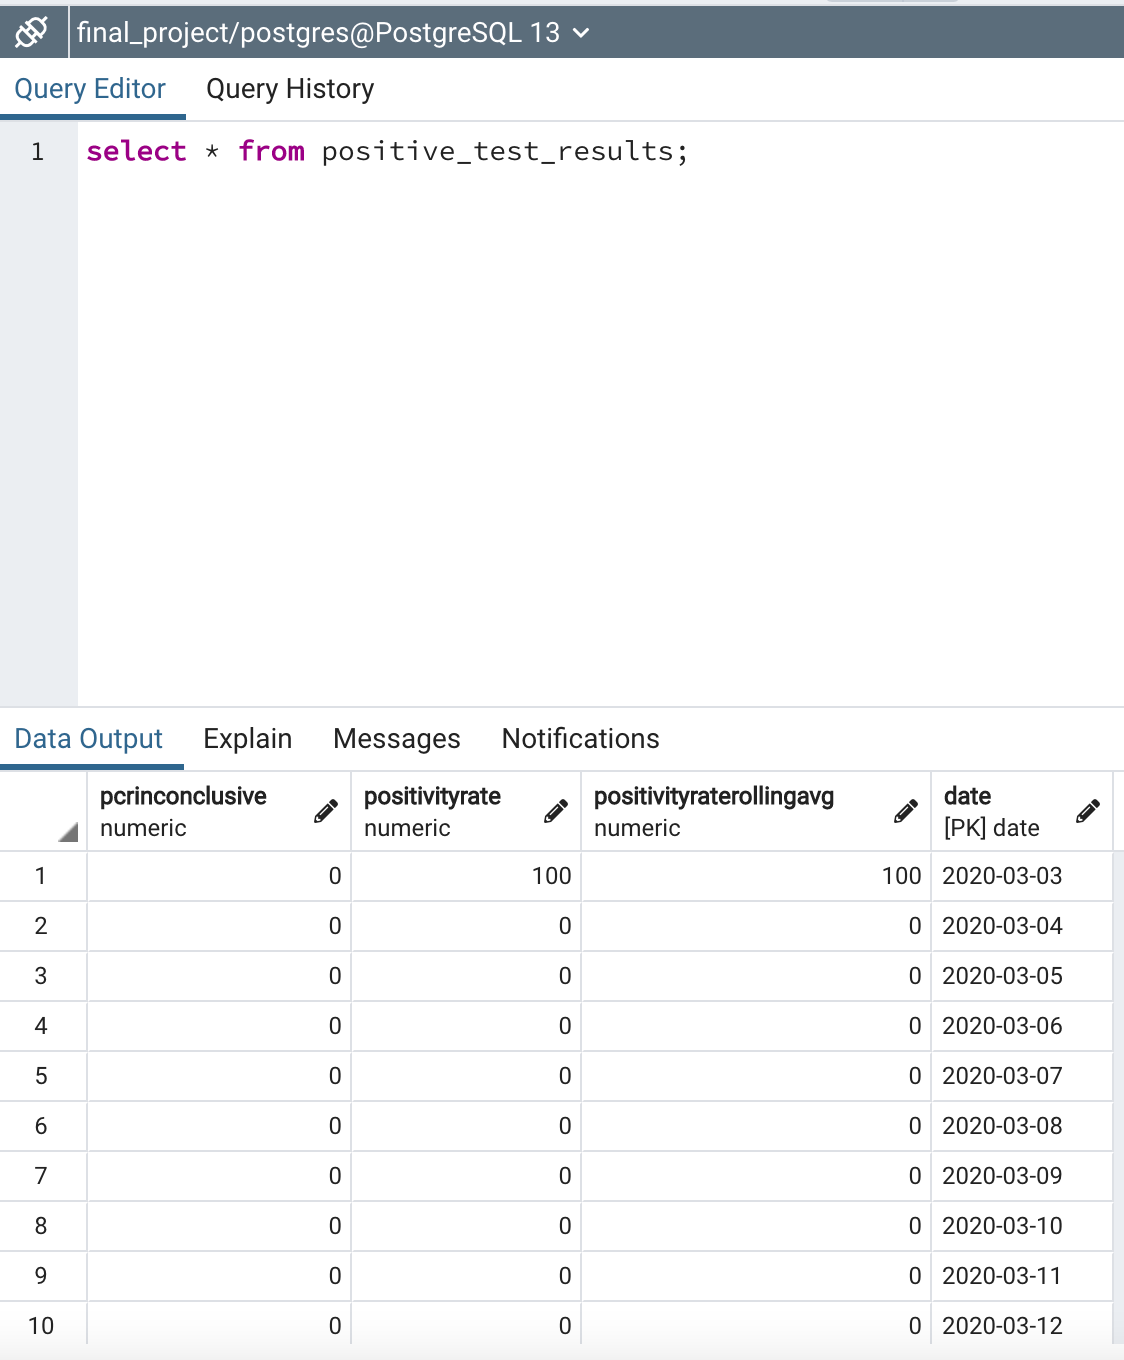

## Join sequel query to join positive test results and serology metrics tables on their primary key - date.

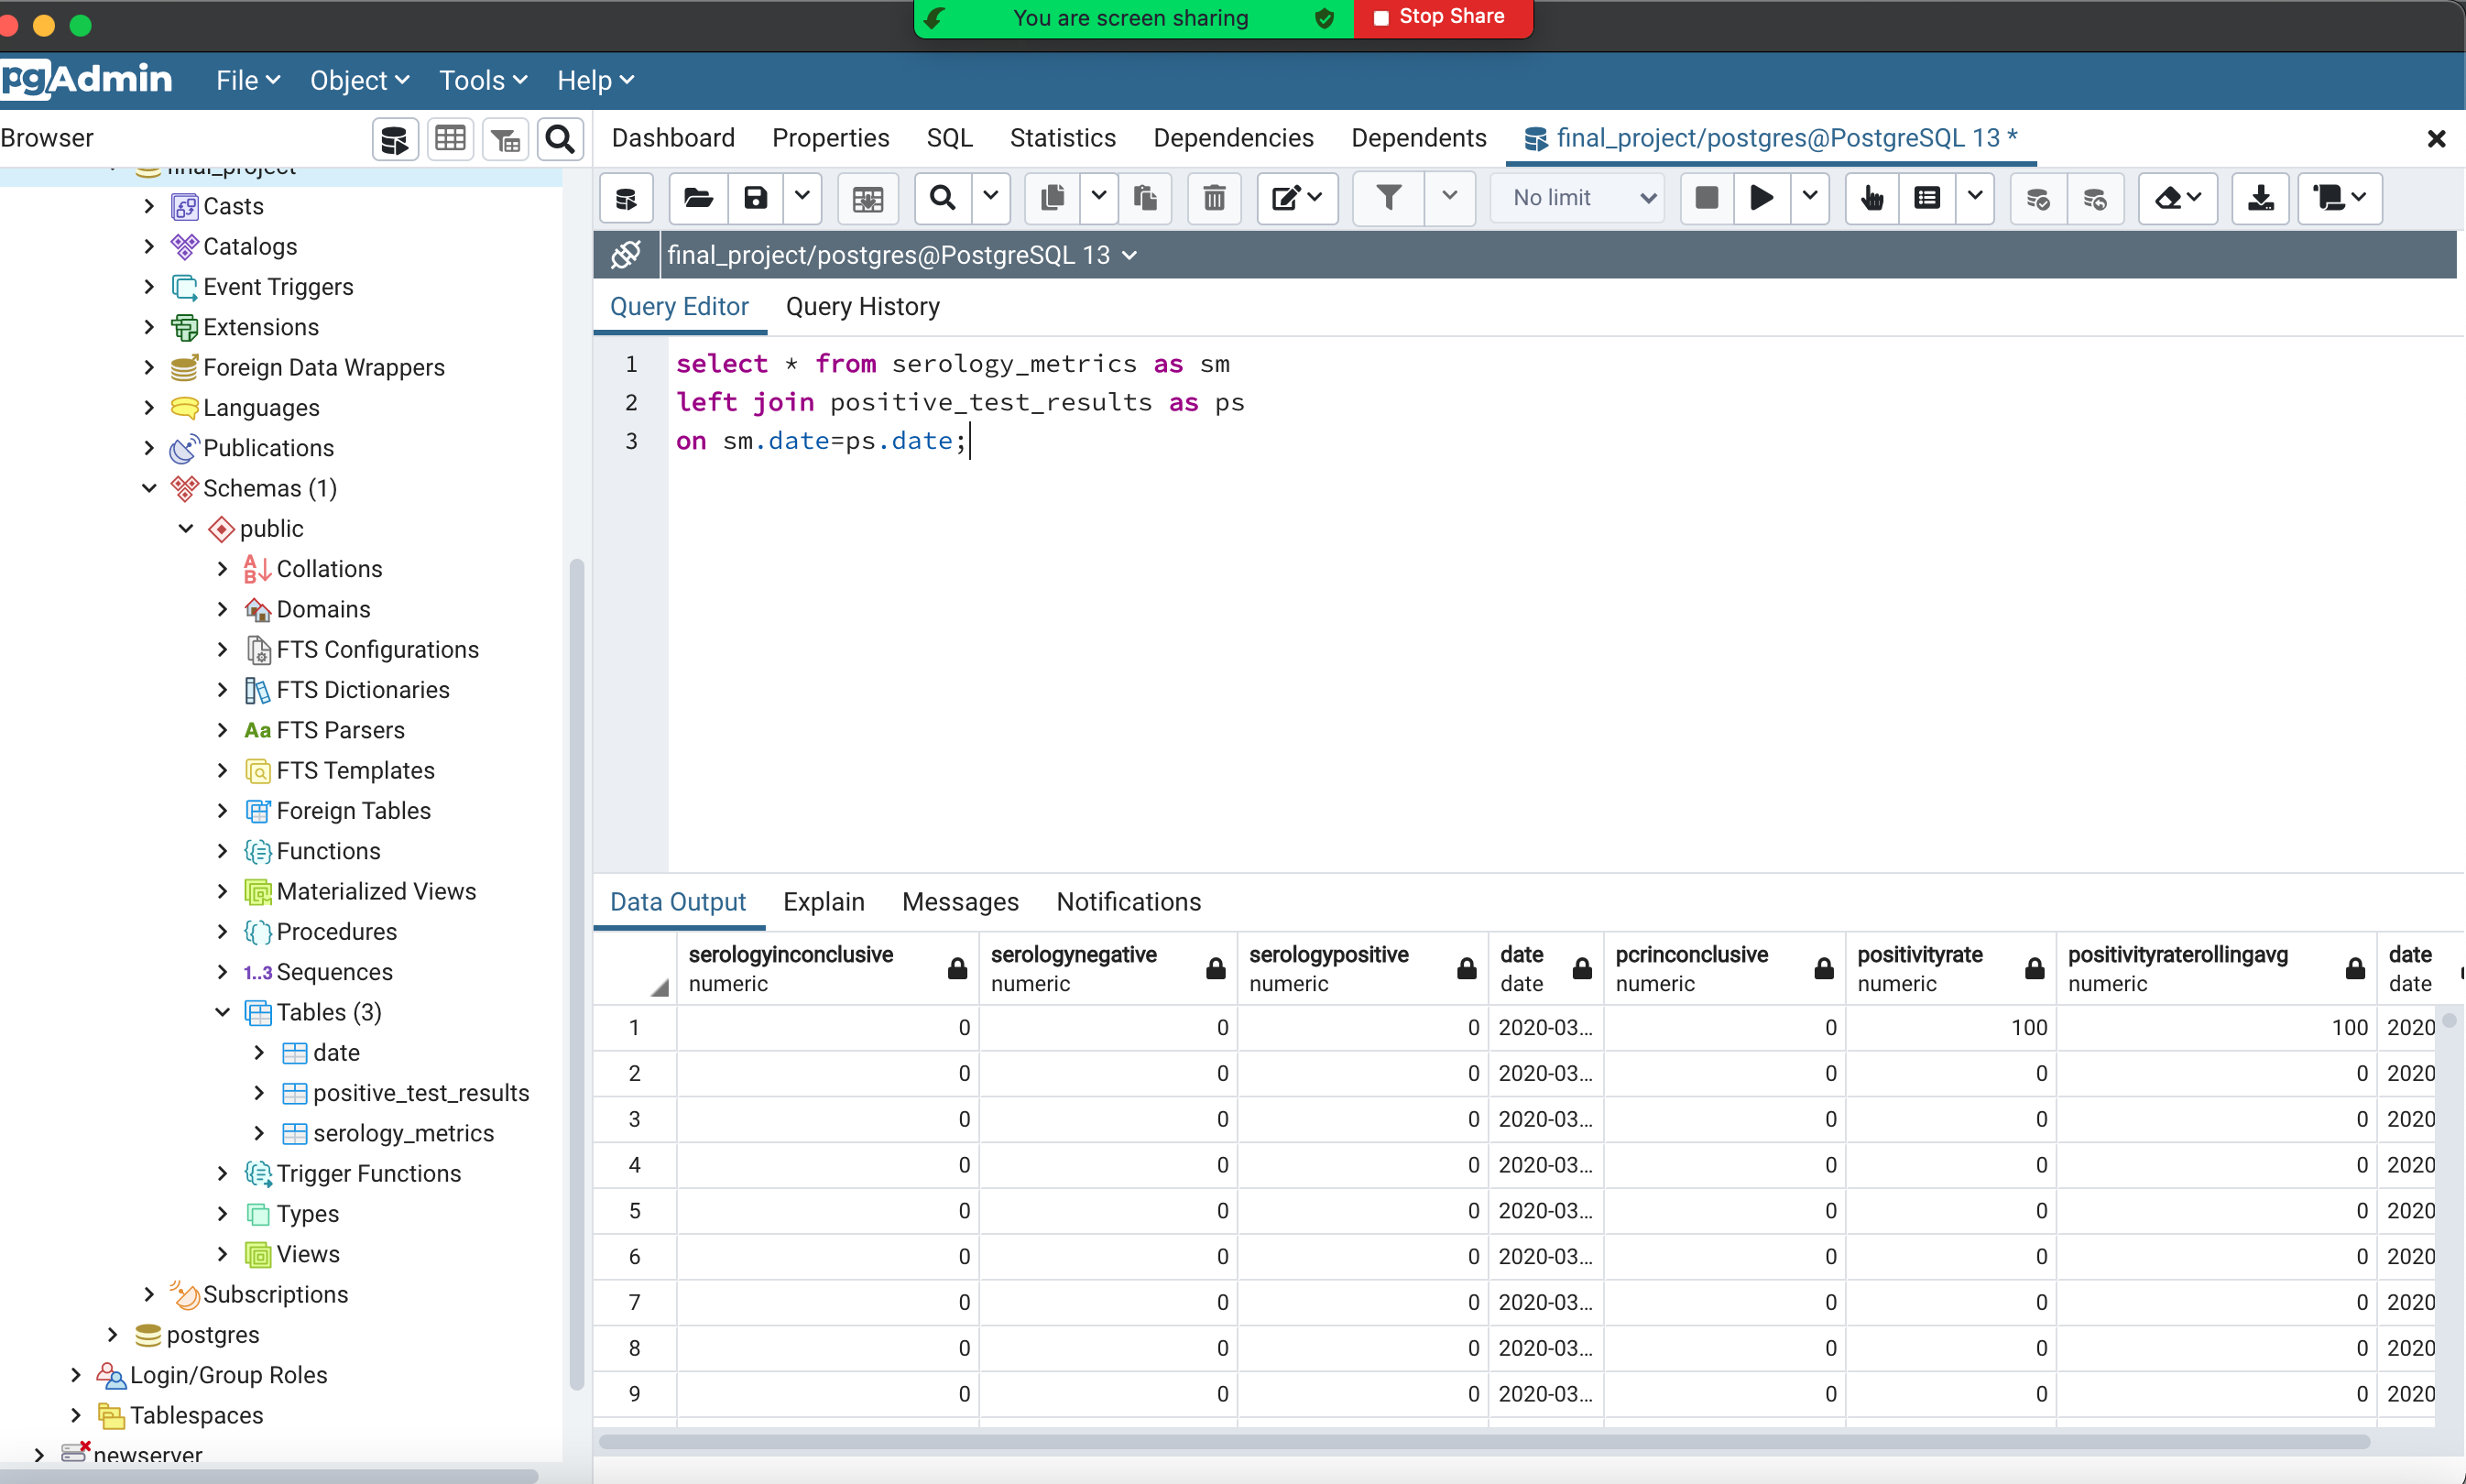